The aim of this notebook is to verify that the fit found for the degree and weight distribustion is working as intended.

We do see some agreement between the analytical and upscaled networks but I am hesitant to jump for joy as I know this will be for a limited parameter space ...

In reality the weight disst being generated here probably has too high an average to be representitive of the original case.

In [1]:
import network_manipulation as nm
import network_stats as ns
import numpy as np

dataset_paths = [
'Sociopatterns datasets/conference_2009.dat_',
'Sociopatterns datasets/highschool_2011.csv',
'Sociopatterns datasets/highschool_2012.csv',
'Sociopatterns datasets/highschool_2013.csv',
'Sociopatterns datasets/hospital_2010.dat_',
'Sociopatterns datasets/primaryschool_2014.csv',
'Sociopatterns datasets/workplace_2013.dat',
'Sociopatterns datasets/workplace_2015.dat_']

dataset_names = [
    'Conference 1', 
    'Highschool 1', 
    'Highschool 2', 
    'Highschool 3', 
    'Hospital 1', 
    'Primaryschool 1', 
    'Workplace 1', 
    'Workplace 2']

In [2]:
H = nm.build_nxgraph(dataset_paths[0], True)

norm_degrees, norm_weights = ns.analyse_graph(H)
print('Normalised weights')
print(norm_degrees[0:5])
print(norm_weights[0:5])

G = nm.build_nxgraph(dataset_paths[0], False) 

degrees, weights = ns.analyse_graph(G)

print('\n Free weights') # gym joke haha
print(degrees[0:5])
print(weights[0:5])

'''
# comparison of networkx and stock python

path = dataset_paths[0]
n = nm.build_network(path)
dd = nm.degree_dist(n)

plt.figure()
plt.hist(dd)
plt.figure()
plt.hist(degrees)
'''


Normalised weights
[69, 82, 60, 95, 38]
[0.013934426229508197, 0.001639344262295082, 0.000819672131147541, 0.02540983606557377, 0.003278688524590164]

 Free weights
[69, 82, 60, 95, 38]
[17, 2, 1, 31, 4]


'\n# comparison of networkx and stock python\n\npath = dataset_paths[0]\nn = nm.build_network(path)\ndd = nm.degree_dist(n)\n\nplt.figure()\nplt.hist(dd)\nplt.figure()\nplt.hist(degrees)\n'

FITTING TO WEIGHT DIST

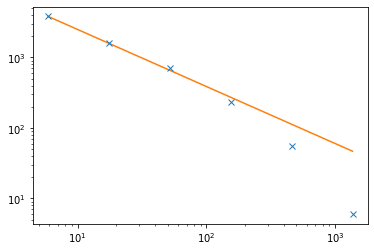

(array([ 1.60159911e+04, -8.08602749e-01]), array([4.26929428, 2.54719899]))

In [4]:
ns.check_fit(ns.weight_func, ns.log_binning, weights, [2.97, False] , False, True, 'log')


In [5]:
scaly = np.arange(1.5, 3.1, 0.1)
ns.compare_scale(ns.weight_func, weights, scaly, False, False)

  best scaling factor    best average error
---------------------  --------------------
                  2.8                  4.23


(2.800000000000001, 4.227722840657332)

In [3]:
scaly = np.arange(1.5, 3.0, 0.01)
scale, _ = ns.compare_scale(ns.weight_func, weights, scaly, False, False)

  best scaling factor    best average error
---------------------  --------------------
                 1.97                  2.48


In [7]:
x, y = ns.log_binning(weights, 2.8, False)
fit, cov = curve_fit(ns.weight_func, x, y)

#plt.plot(x, y)

class distribution(sps.rv_continuous): 
    def _pdf(self, x):
        return ns.weight_func(x, *fit)

dist = distribution(a=0)
samples = dist.rvs(size = 100)
#samples = np.ceil(samples)
#freqs, edegs, _ = plt.hist(samples, bins = 50, density = 0)

x , y = ns.linear_binning(samples, 10, False)
plt.plot(x, y)

NameError: name 'curve_fit' is not defined

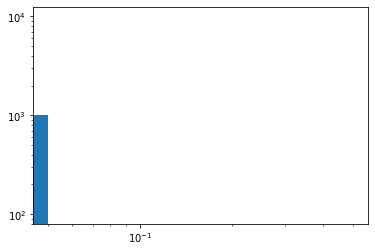

In [ ]:
import matplotlib.pyplot as plt

wfit, _ = ns.check_fit(ns.weight_func, ns.log_binning, weights, [scale, False])

sample_dist = ns.weight_distribution(a = 0)
samples = sample_dist.rvs( a = wfit[0] ,b = wfit[1], size = 1000)
freqs, edges, _ = plt.hist(samples, bins = 20, density = 0)
plt.yscale('log')
plt.xscale('log')

# While I managing to generate a distribution, unfortunately the weights are
# on the order e-10 where i expected whole numbers as I am working in an 
# un-normalized regime

# further, there are some parameter combinations, which can cause a lack of
# convegence and hence a lack of a distribution, this can occur for the supposeded
# optimum scale,

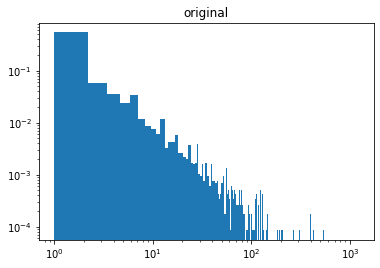

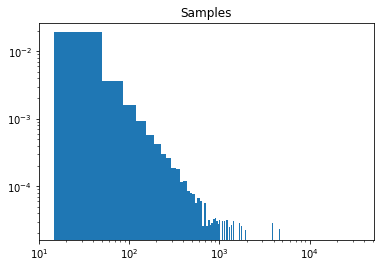

In [5]:
# Generating weight samples, it looks like a power law may not be the answer
# as there is a shallower gradient on where the graph is dying out, perhaps this
# is ok as a larger graph will lead to more connections but regardless this does
# not fit the distibution exactly 

# However we see much better performance when choosing optimum scale

# further, normalisation is dominated by a small frequency of very large values

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# idea from https://stats.stackexchange.com/questions/173242/random-sample-from-power-law-distribution

def inverse_weight_func(x, a, b):
    return (x/a) ** (1/b)

x, y = ns.log_binning(weights, scale, False)
fit, cov = curve_fit(ns.weight_func, x, y)

randys = np.random.randint(1, 1000, size = 100000) # not sure about this [SUPERVISOR]
#randys = np.random.rand(100000)
weight_samples = inverse_weight_func(randys, *fit)

plt.figure()
plt.hist(weights, bins = 1000, density = 1)
plt.title('original')
plt.yscale('log')
plt.xscale('log')

plt.figure()
plt.hist(weight_samples, bins = 1000, density = 1)
plt.title('Samples')
plt.yscale('log')
plt.xscale('log')

norm = max(weight_samples)
weight_samples = weight_samples / norm

# for some reason, calculating fit using check_fit gives differnet parameter estimate
# than doing so manually, at least for the degree distribution [INVESTIGATE]

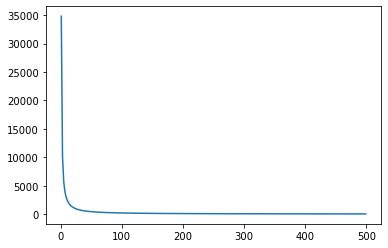

In [9]:
x = np.arange(1, 500, 2)
y = inverse_weight_func(x, fit[0], fit[1])
plt.plot(x,y)

FITTING TO DEGREE DIST

/Users/ali/MSci Project/network_stats.py:98: RuntimeWarning: overflow encountered in power
  return (x**a) / np.exp(b*x+c)
/Users/ali/MSci Project/network_stats.py:98: RuntimeWarning: divide by zero encountered in true_divide
  return (x**a) / np.exp(b*x+c)
/Users/ali/MSci Project/network_stats.py:98: RuntimeWarning: overflow encountered in true_divide
  return (x**a) / np.exp(b*x+c)


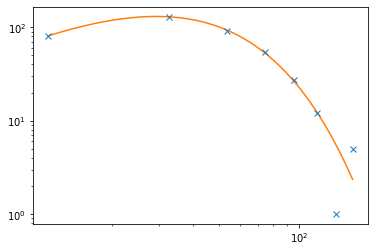

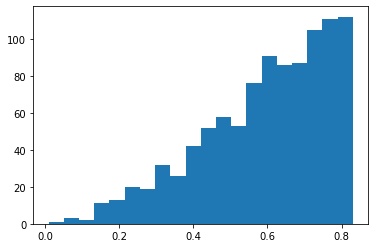

In [ ]:
dfit, _ = ns.check_fit(ns.degree_func, ns.linear_binning, degrees, [8, False], False, True, 'log')

sample_dist = ns.degree_distribution(a = 0)
samples = sample_dist.rvs(a = dfit[0], b = dfit[1], c = dfit[2], size = 1000)
freqs, edges, _ = plt.hist(samples, bins = 20, density = 0)
#plt.yscale('log')
#plt.xscale('log')

# for some reason the generated distribution, which was previously perfirming well
# has now completely cahnged form

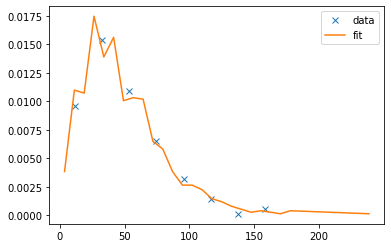

In [6]:
# degrees scaled up to 1000 nodes (success)

from scipy.optimize import curve_fit
import scipy.stats as sps

x, y = ns.linear_binning(degrees, 8, 1)
fit, cov = curve_fit(ns.degree_func, x, y)

# for some reason this works better than versionn in ns
        
class degree_distribution(sps.rv_continuous): #
    def _pdf(self, x):
        return ns.degree_func(x, *fit)


ddist = degree_distribution(a=0)
degree_samples = ddist.rvs(size = 1000)
degree_samples = np.ceil(degree_samples).astype(int)

plt.figure()
plt.plot(x, y, 'x', label = 'data')

sample_x, sample_y = ns.linear_binning(degree_samples, 32, 1)
plt.plot(sample_x, sample_y, label = 'fit')

plt.legend(loc = 'upper right')


In [7]:
import networkx as nx

x, y = ns.log_binning(weights, scale, False)
wfit, wcov = curve_fit(ns.weight_func, x, y)

def sample_weights(sample_num):
    randys = np.random.randint(1, 1000, size = sample_num)
    weight_samples = inverse_weight_func(randys, *wfit)
    norm = max(weight_samples)
    weight_samples = weight_samples / norm
    return weight_samples

def set_weights(G):
    nodes = list(G.nodes)
    for node in nodes:
        connections = list(G.neighbors(node))
        num_edges = len(connections)
        if num_edges == 0:
            print('What the dog doin')
        else:
            weights = sample_weights(len(connections))
        for i, connection in enumerate(connections):
            G[node][connection]['weight'] = weights[i]
    return G            

graph = nx.configuration_model(degree_samples, create_using = nx.Graph)
graph = set_weights(graph)

# There exist some nodes with no connections whatsoever, as this is a very
# small proportion of nodes, it should not effect the efficiency of the
# algorithm too much and will definately not affect its accuracy as these are simply
# not connected to the rest of the network, however, perhaps there can be some 
# network statistics that can be thrown off [SUPERVISOR]

What the dog doin
What the dog doin
What the dog doin
What the dog doin
What the dog doin
What the dog doin
What the dog doin
What the dog doin
What the dog doin
What the dog doin
What the dog doin
What the dog doin
What the dog doin


In [34]:
arr = sample_weights(100)
print(arr)

[0.07740526 0.0063099  0.01048218 0.0107492  0.11719237 0.01321977
 0.02980176 0.02889035 0.00915449 0.0567528  0.00924179 0.02257662
 0.02265624 0.009406   0.16033988 0.00817007 0.00827604 0.0108081
 0.04033955 0.00661604 0.00644837 0.00825226 0.02108851 0.026555
 0.02839283 0.04232834 0.01109121 0.00957581 0.03494548 0.02158775
 0.00662386 1.         0.00792152 0.00876687 0.00862296 0.05254333
 0.00946708 0.00631705 0.09522311 0.00874037 0.00728297 0.00826413
 0.01685304 0.00633859 0.00849595 0.02592262 0.03225826 0.00850849
 0.13797993 0.00976777 0.0844751  0.01207961 0.02839283 0.00956013
 0.006695   0.01732179 0.00744547 0.01451266 0.01141049 0.00644837
 0.20505199 0.00887441 0.0120311  0.00921252 0.14563536 0.00723645
 0.00898448 0.05586083 0.01013924 0.01756551 0.00763538 0.02365469
 0.01756551 0.05720895 0.00693439 0.04993242 0.00753431 0.0110089
 0.0208129  0.02015281 0.00745525 0.01299255 0.00634579 0.00794353
 0.00691736 0.03587382 0.01170156 0.01235317 0.00714506 0.00892912

0
1
2
3
4


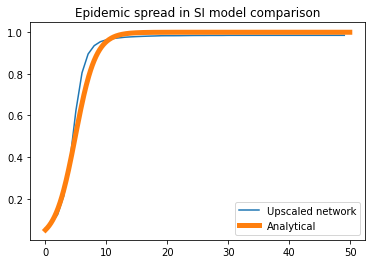

In [8]:
# Make this into a function

import SI_model_nx as sinx

T = 50 # days over which we simulate
I = 0.05 # initial infected fraction
b = 0.6 # transmission rate of contagion
M = 5 # number of runs to smooth model over
threshold = 2

# can make all of these parameters into a dictionary

plt.figure()
t = sinx.generate_t(T, 1)
model_SI = sinx.smooth(graph, I, threshold, T, M)
plt.plot(t, model_SI, label = 'Upscaled network')

h = 0.1 # increment
t = sinx.generate_t(T, h)
c = sinx.integration_const(I)
analytic_SI = sinx.analytic_sol(t, b, c) # should be correct ...
plt.plot(t, analytic_SI, linewidth = 5, label = 'Analytical')

plt.legend(loc = 'lower right')
plt.title('Epidemic spread in SI model comparison')
plt.show()

# Looks like we have to tune the threshold to get agreement with the analytical
# solution, should we expect this? [SUPERVISOR]

0
1
2
3
4


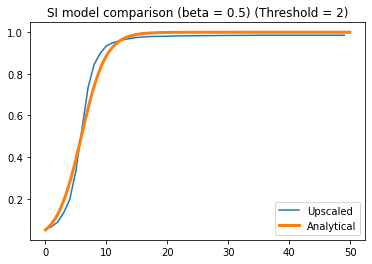

In [24]:
# This is a very nice thing

import SI_model_nx as sinx

simulation_params = {}
simulation_params['Time'] = 50
simulation_params['Initial'] = 0.05
simulation_params['Beta'] = 0.5
simulation_params['Runs'] = 5
simulation_params['Threshold'] = 2
simulation_params['Increment'] = 0.1

def SI_comparison(G, params, name = 'Placeholder'):
    plt.figure()
    sim_activity = sinx.smooth(G, params['Initial'], params['Threshold'], params['Time'], params['Runs'], params['Beta'])
    sim_time = np.arange(0, params['Time'], 1)
    plt.plot(sim_time, sim_activity, label = name)
    
    analytic_time = np.arange(0, params['Time'], params['Increment'])
    const = sinx.integration_const(params['Initial'])
    analytic_activity = sinx.analytic_sol(analytic_time, params['Beta'], const)
    plt.plot(analytic_time, analytic_activity, linewidth = 3, label = 'Analytical')
    
    plt.legend(loc = 'lower right')
    plt.title('SI model comparison (beta = ' + str(params['Beta'])+ ') (Threshold = ' + str(params['Threshold']) + ')')
    plt.show()
    
SI_comparison(graph, simulation_params, 'Upscaled')

# To note, simulation takes longer to run for higher beta, this makes sense as if 
# the infection needs to be propagated, there will be more work in updated the graph
# can look at have multiple dictionaries / arrays for storing different parts of the
# graph such as potential and weight to speed up operation.

# We see good agreement for high beta but poor agreement below approx  beta = 0.3
# with deviation from ODE especially prominent at early times.

In [32]:
graph[0][740]

{'weight': 0.016037374147480986}